# Import Library
berikut adalah library yang digunakan pada penelitian ini

In [2]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# Model
from sklearn.svm import SVC

import pickle

# Matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('dataset/datatrain-final.csv')
df = df.iloc[:, 1:]
df

,Usia,Pendidikan,Tes Wawancara,TPA,Tes Keterampilan Teknis,Target
0,25,3,19,16,12,-1
1,28,3,29,16,14,-1
2,24,1,21,17,12,-1
3,20,1,22,13,12,-1
4,27,3,26,13,11,1
...,...,...,...,...,...,...
77,27,3,23,12,11,-1
78,20,1,27,13,9,-1
79,20,1,29,17,14,1
80,21,1,27,14,15,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Usia                     82 non-null     int64
 1   Pendidikan               82 non-null     int64
 2   Tes Wawancara            82 non-null     int64
 3   TPA                      82 non-null     int64
 4   Tes Keterampilan Teknis  82 non-null     int64
 5   Target                   82 non-null     int64
dtypes: int64(6)
memory usage: 4.0 KB


# Model SVM

Distribusi kelas dalam train set:
-1    34
 1    34
Name: Target, dtype: int64

Distribusi kelas dalam test set:
-1    9
 1    9
Name: Target, dtype: int64


<AxesSubplot: >

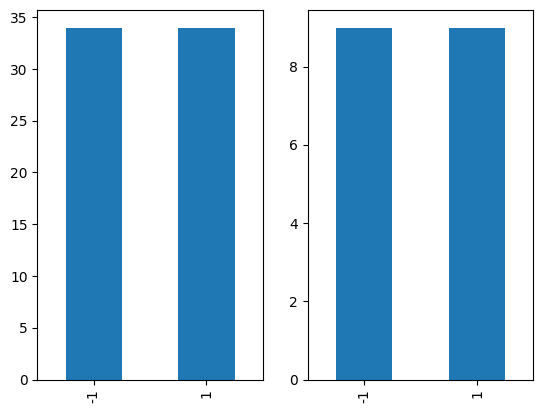

In [16]:
x = df.drop(columns=['Target'])
y = df['Target']

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Melakukan oversampling
x_resampled, y_resampled = ros.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
print("Distribusi kelas dalam train set:")
print(y_train.value_counts())

print("\nDistribusi kelas dalam test set:")
print(y_test.value_counts())

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar')
plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar')

# Training

Training library

In [17]:
model = SVC(kernel='linear', max_iter=100)
model.fit(x_train, y_train)

c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=100)

# Akurasi Model

In [18]:
predictions = model.predict(x_test)
print(f"Akurasi SVM : {accuracy_score(y_test, predictions) * 100} %")

Akurasi SVM : 94.44444444444444 %


In [62]:
pickle.dump(model, open('model.pkl', 'wb'))

## Confusion Matrix

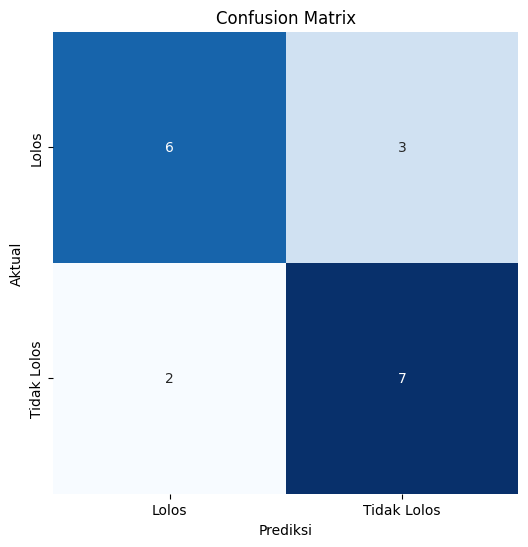

In [63]:
cm = confusion_matrix(y_test, predictions)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Lolos", "Tidak Lolos"],
            yticklabels=["Lolos", "Tidak Lolos"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [64]:
file = open('model.pkl', 'rb')
model = pickle.load(file)
list_predict = []
for i in range(len(df)):
    data = df.iloc[i, :-1].values
    predict = model.predict([data])

    if predict == 1:
        list_predict.append(1)
    else:
        list_predict.append(int(-1))

df['predict_svm'] = list_predict
df

c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\62851\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Us

,Usia,Pendidikan,Tes Wawancara,TPA,Tes Keterampilan Teknis,Target,predict_svm
0,25,3,19,16,12,-1,-1
1,28,3,29,16,14,-1,1
2,24,1,21,17,12,-1,-1
3,20,1,22,13,12,-1,-1
4,27,3,26,13,11,1,-1
...,...,...,...,...,...,...,...
77,27,3,23,12,11,-1,-1
78,20,1,27,13,9,-1,-1
79,20,1,29,17,14,1,1
80,21,1,27,14,15,1,1
